In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.optim as optim
from lr_finder import LRFinder
import models.cifar as models
from datasets import Dataset
from vogn import VOGN
import warnings
warnings.filterwarnings('ignore')

In [3]:
def log_to_pd(log_file):
    train_list = []
    test_list = []
    train_labels = None
    test_labels = None
    with open(log_file, 'r') as file:
        lines = file.read().splitlines()
        for line in lines:
            line = line.split(',')
            if len(line) == 8:
                train_list.append([int(line[1]), int(line[3]), float(line[5]), float(line[7])])
                if train_labels is None:
                    train_labels = [line[0], line[2], line[4], line[6]]
            else:
                test_list.append([int(line[1]), int(line[3]), float(line[5]), float(line[7]),
                                  float(line[9]), float(line[11]), float(line[13])])
                if test_labels is None:
                    test_labels = [line[0], line[2], line[4], line[6], line[8], line[10], line[12]]
    train_pd = pd.DataFrame.from_records(train_list, columns=train_labels)
    test_pd = pd.DataFrame.from_records(test_list, columns=test_labels)
    return train_pd, test_pd

def state_log_to_pd(log_file):
    state_list = []
    state_label = None
    with open(log_file, 'r') as file:
        lines = file.read().splitlines()
        for line in lines:
            line = line.split(',')
            #print(line)
            state_list.append([int(line[1]), int(line[3]), float(line[5]), float(line[7]), float(line[9]), float(line[11]), float(line[13])])
            if state_label is None:
                state_label = [line[0], line[2], line[4], line[6], line[8], line[10], line[12]]
    state_pd = pd.DataFrame.from_records(state_list, columns=state_label)
    return state_pd

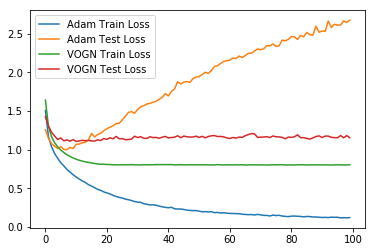

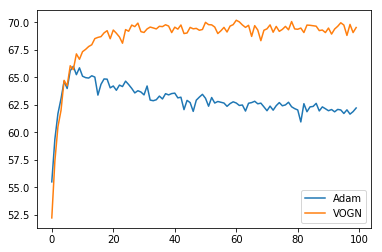

In [42]:
_, ca =log_to_pd('./result/lenet5bn_cifar10_adam')
_, cv =  log_to_pd('./result/lenet5bn_cifar10_vogn')
plt.plot(ca.loss, label='Adam Train Loss')
plt.plot(ca.test_loss, label='Adam Test Loss')
plt.plot(cv.loss, label='VOGN Train Loss')
plt.plot(cv.test_loss, label='VOGN Test Loss')
plt.legend()
plt.show()
plt.plot(ca.test_accuracy, label='Adam')
plt.plot(cv.test_accuracy, label='VOGN')
plt.legend()

In [35]:
from glob import glob
test_loss_adam = []
for file in glob('./result/lm_adam_*[!.pt]'):
    _, test_pd = log_to_pd(file)
    test_loss_adam.append(test_pd.test_loss)
test_loss_adam = np.array(test_loss_adam)
test_loss_vogn = []
for file in glob('./result/lm_vogn_*[!.pt]'):
    _, test_pd = log_to_pd(file)
    test_loss_vogn.append(test_pd.test_loss)
test_loss_vogn = np.array(test_loss_vogn)

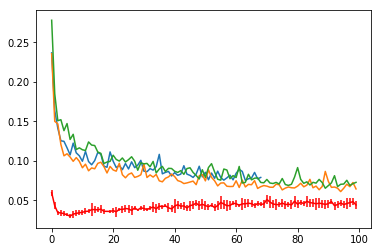

In [36]:
plt.errorbar(range(test_loss_adam.shape[-1]), np.mean(test_loss_adam, axis=0), yerr=np.std(test_loss_adam,axis=0), color='red')
for l in test_loss_vogn:
    plt.plot(l)